In [409]:
import random
from collections import Counter
from math import sqrt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

Text(0, 0.5, 'Значение случайной величины')

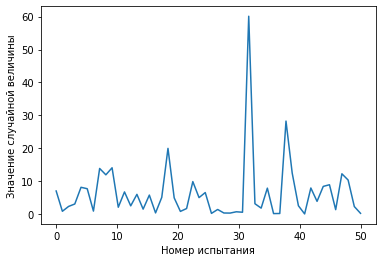

In [410]:
expon = sps.expon(loc=0, scale=5)
num = 50
sample = expon.rvs(num)
X = np.linspace(0, num, num)
plt.plot(X, sample)
plt.xlabel("Номер испытания")
plt.ylabel("Значение случайной величины")

Text(0, 0.5, 'Значение эмпирической функции распределения')

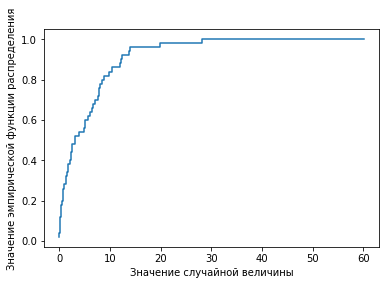

In [411]:
sample = sorted(sample)
cdf = [1.0 / num]
for i in range(1, num):
    cdf.append(cdf[i - 1] + 1.0 / num)
    
plt.step(sample, cdf)
plt.xlabel("Значение случайной величины")
plt.ylabel("Значение эмпирической функции распределения")

In [412]:
df = pd.DataFrame(sample)
characteristics = df.describe()
df = df.apply(pd.Series.value_counts, bins=10)

# sort by interval
df['interval'] = df.index
df['sortkey']=df.interval.map(lambda x : x.left)
df = df.sort_values('sortkey')
del df['sortkey']
del df['interval']

df.rename(columns={0: 'Count'}, inplace=True)
df['Relative'] = (df['Count'] / num) * 100
df['Cumulative'] = df['Relative'].cumsum()
df.T

,"(-0.0309, 6.038]","(6.038, 12.046]","(12.046, 18.054]","(18.054, 24.062]","(24.062, 30.07]","(30.07, 36.077]","(36.077, 42.085]","(42.085, 48.093]","(48.093, 54.101]","(54.101, 60.109]"
Count,31.0,12.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
Relative,62.0,24.0,8.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0
Cumulative,62.0,86.0,94.0,96.0,98.0,98.0,98.0,98.0,98.0,100.0


(array([31., 12.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([3.02145599e-02, 6.03808999e+00, 1.20459654e+01, 1.80538409e+01,
        2.40617163e+01, 3.00695917e+01, 3.60774672e+01, 4.20853426e+01,
        4.80932180e+01, 5.41010935e+01, 6.01089689e+01]),
 <a list of 10 Patch objects>)

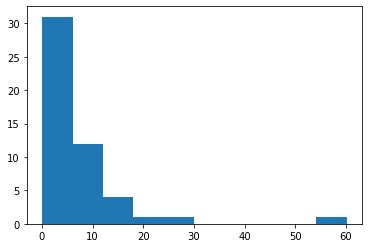

In [413]:
plt.hist(sample, bins=10)

In [414]:
def create_table(sample):
    stats = pd.DataFrame(sample)
    sample = np.array(sample)

    df = pd.DataFrame()
    df['mean'] = stats.mean()
    left, right = sps.t.interval(0.95, num-1, loc=np.mean(sample), scale=sps.sem(sample))
    df['confid_l'] = left
    df['confid_r'] = right
    df['sum'] = stats.sum()
    df['min'] = stats.min()
    df['max'] = stats.max()
    df['range'] = stats.max() - stats.min()
    df['var'] = stats.var()
    df['std'] = stats.std()
    df['median'] = np.median(sample)
    
    return df

In [415]:
df = create_table(sample)  

theor_mean = expon.mean()
theor_std = expon.std()
theor_median = expon.median()

df = df.append({'mean': theor_mean, 'median': theor_median, 'std': theor_std}, ignore_index=True)
df

,mean,confid_l,confid_r,sum,min,max,range,var,std,median
0,6.469226,3.742458,9.195994,323.461283,0.030215,60.108969,60.078754,92.057227,9.594646,3.488678
1,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.465736


Text(0, 0.5, 'Y')

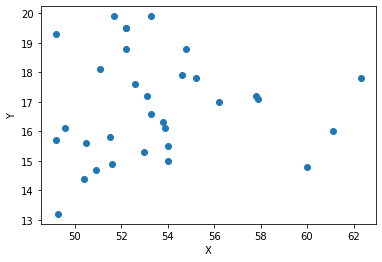

In [416]:
X = np.array([57.8, 54.6, 54.8, 51.7, 61.1, 62.3, 52.2, 49.2, 53.9, 60, 56.2, 55.2, 53.3, 57.9, 54, 52.6, 53.8, 53.1, 51.5, 54, 50.4, 53, 53.3, 51.6, 50.9, 49.6, 52.2, 50.5, 51.1, 52.2, 49.2, 49.3])
Y = np.array([17.2, 17.9, 18.8, 19.9, 16, 17.8, 18.8, 19.3, 16.1, 14.8, 17, 17.8, 19.9, 17.1, 15.5, 17.6, 16.3, 17.2, 15.8, 15, 14.4, 15.3, 16.6, 14.9, 14.7, 16.1, 19.5, 15.6, 18.1, 19.5, 15.7, 13.2])
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

In [417]:
dfX = create_table(X)
dfX

,mean,confid_l,confid_r,sum,min,max,range,var,std,median
0,53.515625,52.326569,54.704681,1712.5,49.2,62.3,13.1,11.203296,3.347133,53.05


In [418]:
dfY = create_table(Y)
dfY

,mean,confid_l,confid_r,sum,min,max,range,var,std,median
0,16.85625,16.226498,17.486002,539.4,13.2,19.9,6.7,3.14254,1.772721,16.8


In [419]:
data = {'X': X, 'Y': Y}
df = pd.DataFrame(data, columns=['X', 'Y'])
df.corr()

,X,Y
X,1.000000,0.063672
Y,0.063672,1.000000


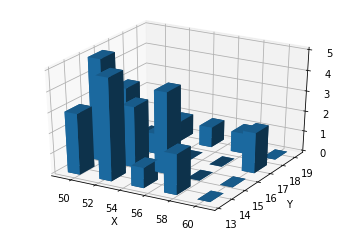

In [432]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(X, Y, bins=(5,4))

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 1 
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()